In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('Mall_Customers.csv', index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# 1.- Análisis de Datos Exploratorio

## 1.1 Análisis Univariante

In [2]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [3]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

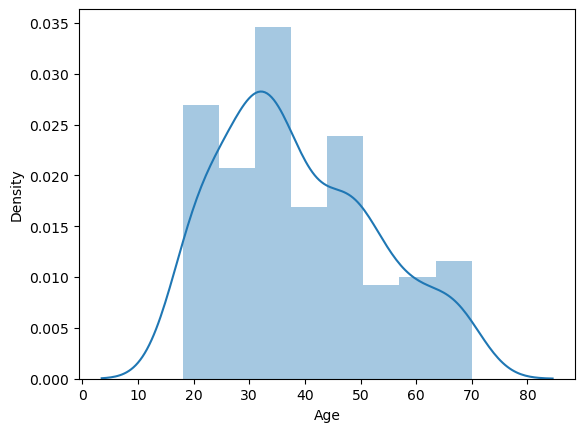

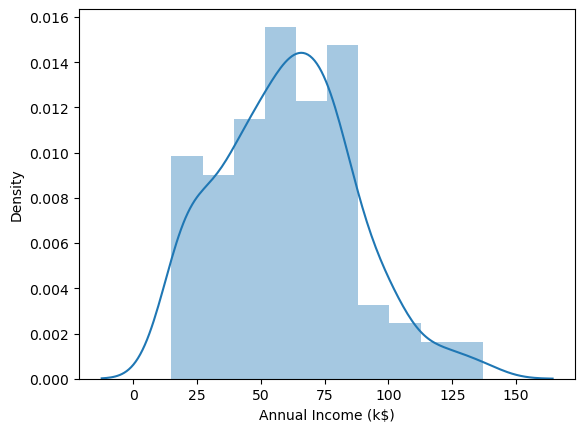

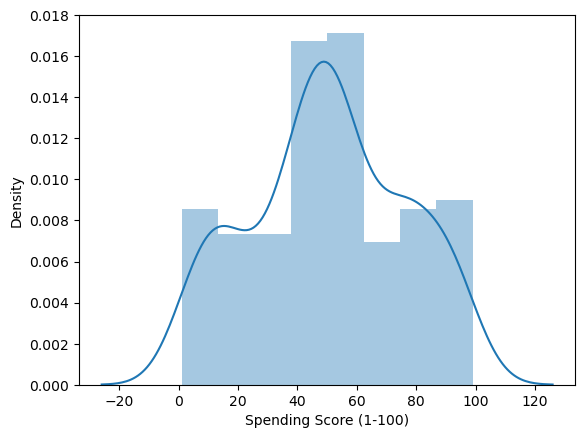

In [4]:
columns=[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i]);

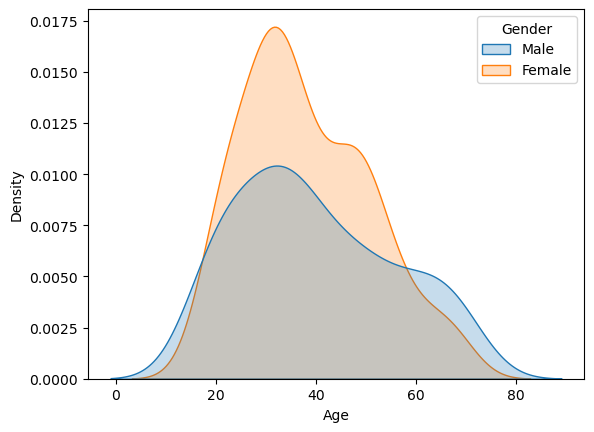

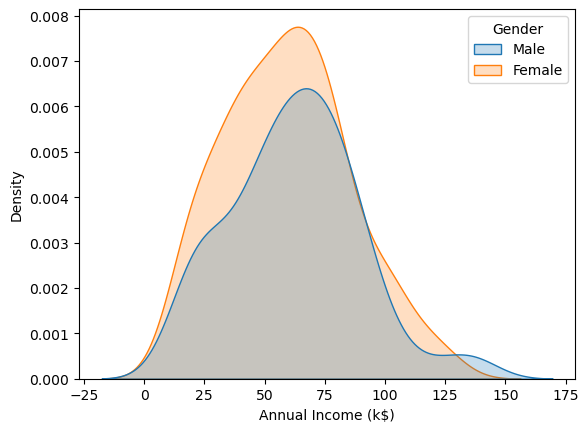

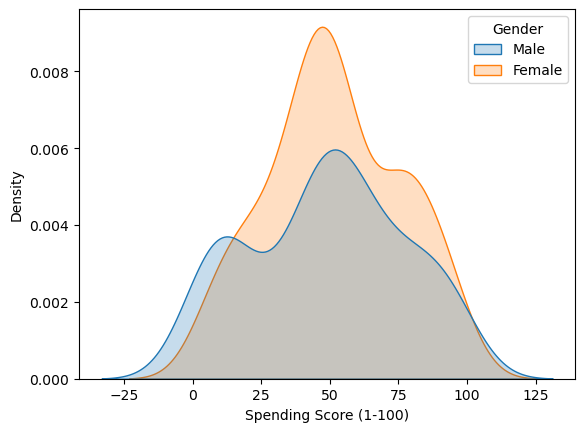

In [29]:
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender']);

##### - Podemos ver que hay más frecuencia de mujeres de 20 a 40 años en el mall


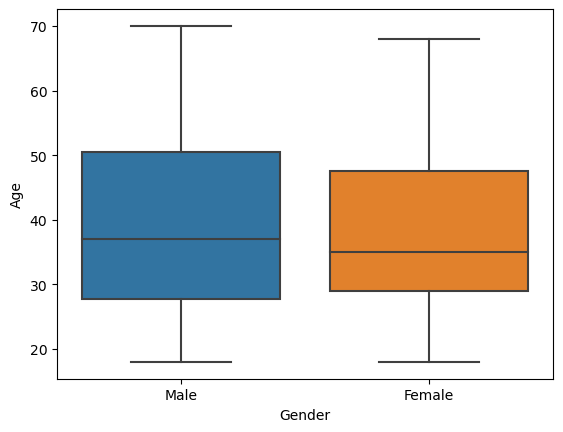

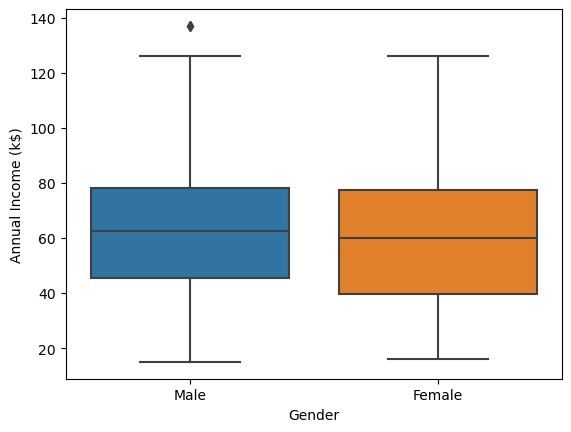

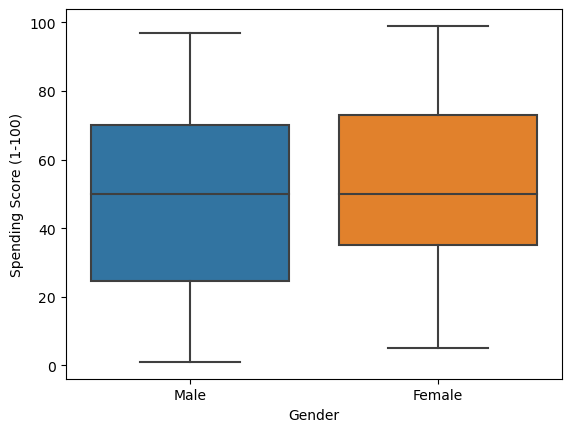

In [30]:
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i]);

In [31]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

#### Se puede observar que hay más mujeres que hombres en total en nuestra data

## 1.2 Análisis Bivariante

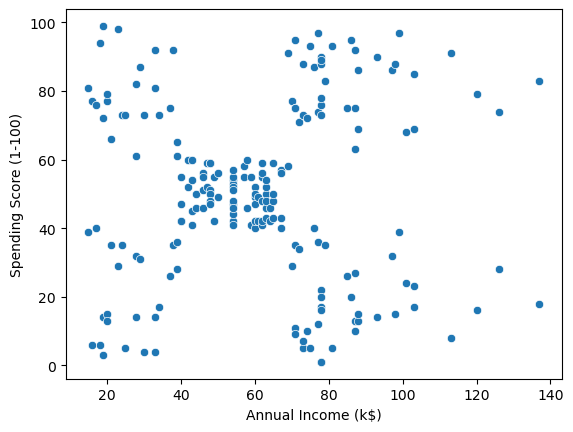

In [32]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)');

Superficialmente podemos ver que se pueden ver 5 grupos con respecto a 'Spending Score' y 'Anual Income'

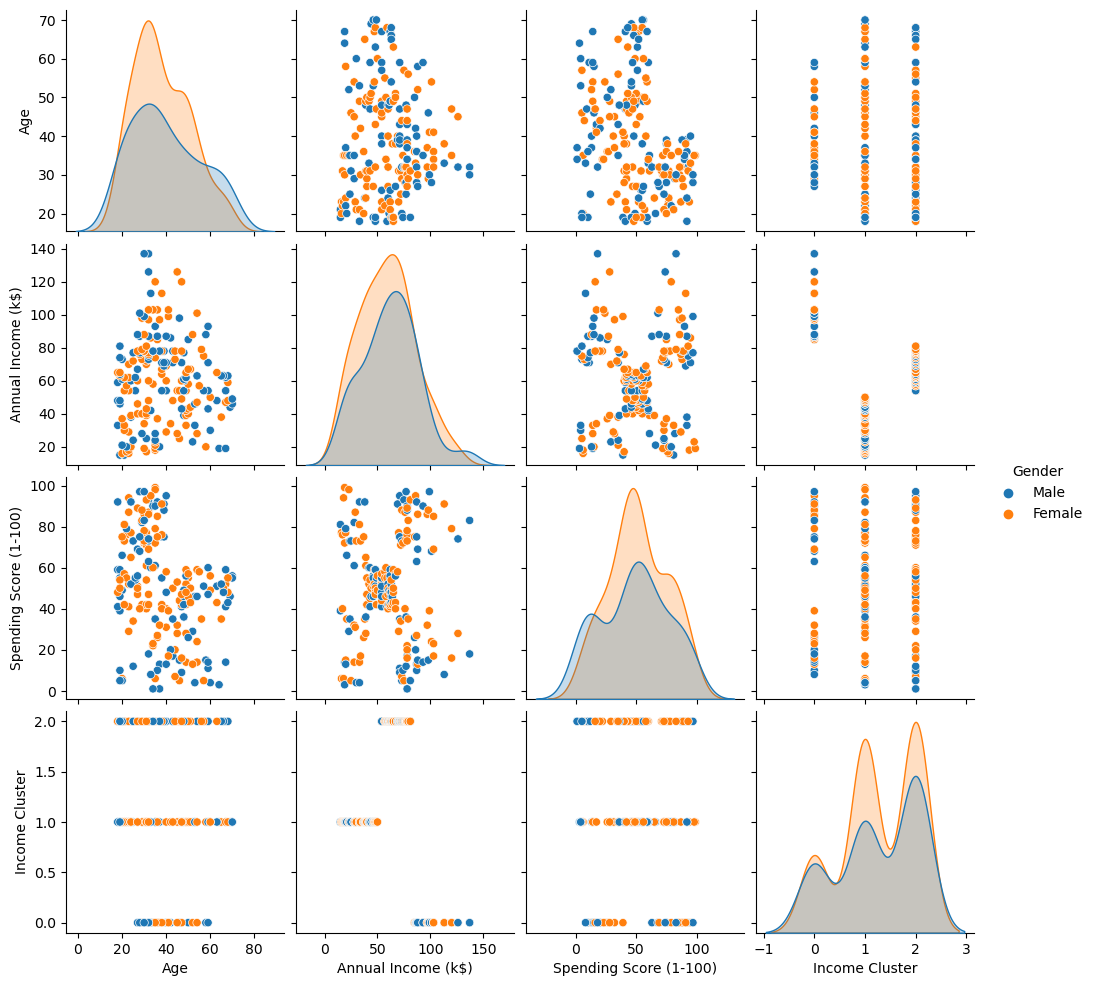

In [33]:
sns.pairplot(df,hue='Gender');

In [34]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


#### -Podemos ver que la edad es muy similar
#### -El Annual Income es ligeramente mayor en los hombres
#### -El Spending Score es ligeramente mayor en mujeres

In [35]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
Age,1.000000,-0.012398,-0.327227,0.012067
Annual Income (k$),-0.012398,1.000000,0.009903,-0.211775
Spending Score (1-100),-0.327227,0.009903,1.000000,-0.008790
Income Cluster,0.012067,-0.211775,-0.008790,1.000000


<AxesSubplot:>

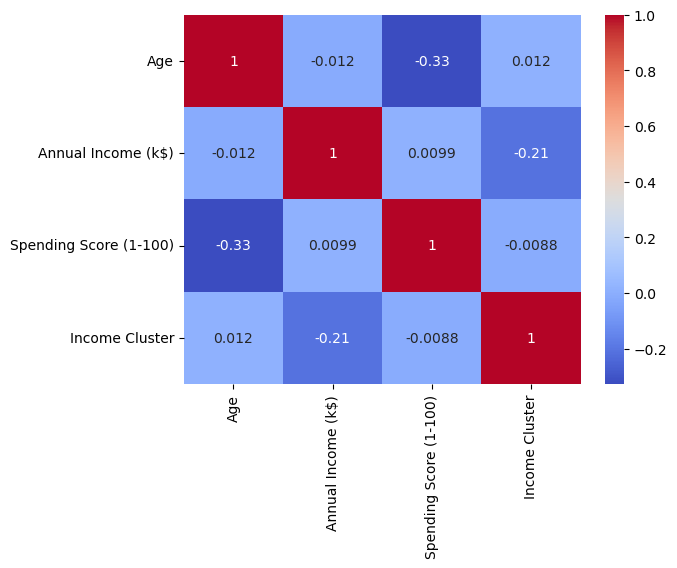

In [36]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# 2.- K-Means Clustering - Univariante, Bivariante, Multivariante

## 2.1 Clustering Univariante - Elbow Method

In [37]:
clustering1= KMeans(n_clusters=3)

In [38]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [39]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [40]:
df['Income Cluster']=clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,2
3,Female,20,16,6,2
4,Female,23,16,77,2
5,Female,31,17,40,2


In [41]:
df['Income Cluster'].value_counts()

0    92
2    72
1    36
Name: Income Cluster, dtype: int64

In [42]:
clustering1.inertia_

23528.152173913044

In [43]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [44]:
inertia_scores

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3949.2756132756135,
 2836.3399877899883,
 2168.4787157287155,
 1769.9674603174606]

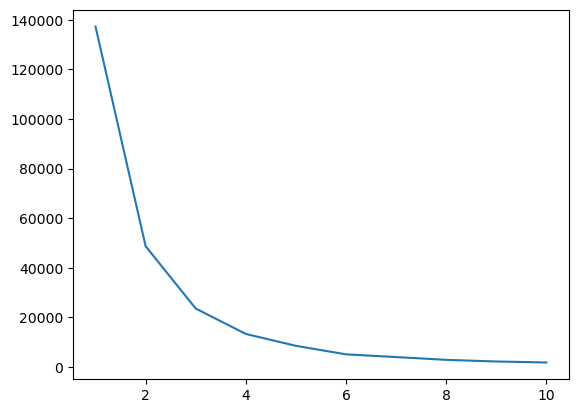

In [45]:
plt.plot(range(1,11),inertia_scores)

In [46]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [47]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,37.833333,99.888889,50.638889
2,38.930556,33.027778,50.166667


## 2.2 Clustering Bivariante

In [52]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster']=clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
CustomerID,,,,,,
1,Male,19,15,39,2,4
2,Male,21,15,81,2,3
3,Female,20,16,6,2,4
4,Female,23,16,77,2,3
5,Female,31,17,40,2,4


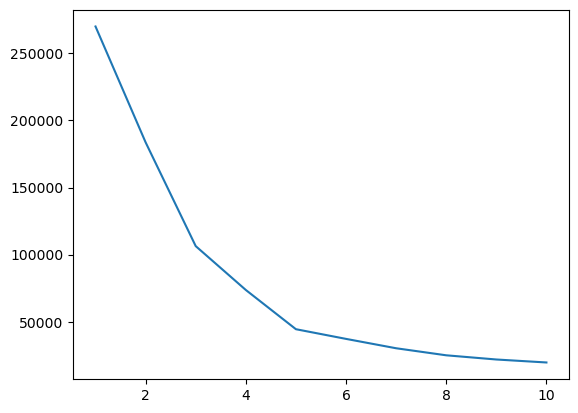

In [51]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [59]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

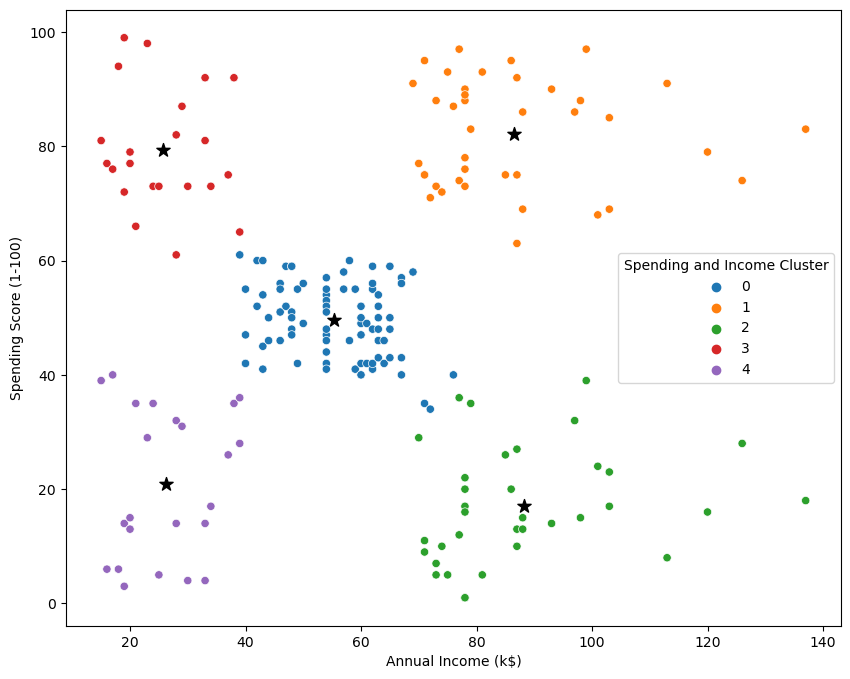

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette ='tab10')

Como se puede ver, el clustering bivarable salió bien y no es necesario escalar la data.

In [64]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


In [65]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


#### -Podemos observar que el cluster 1 del análisis bivariable de ingresos anuales y spending score es el segundo con la menor edad en promedio y tienen un un alto ingreso anual y spending score de los clusters.
#### -Además, se observa que el cluster 3 que es el que tiene la menor edad en promedio, tiene un ingreso anual bajo y un spending score muy alto. 

## 2.3 Clustering Multivariable

In [67]:
from sklearn.preprocessing import StandardScaler

In [79]:
scale= StandardScaler()

Tenemos que convertir el Género en un valor numérico para poder hacer el clustering multivariable

In [70]:
dff=pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
CustomerID,,,,,,
1,19,15,39,2,4,1
2,21,15,81,2,3,1
3,20,16,6,2,4,0
4,23,16,77,2,3,0
5,31,17,40,2,4,0


In [71]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [73]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


In [83]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


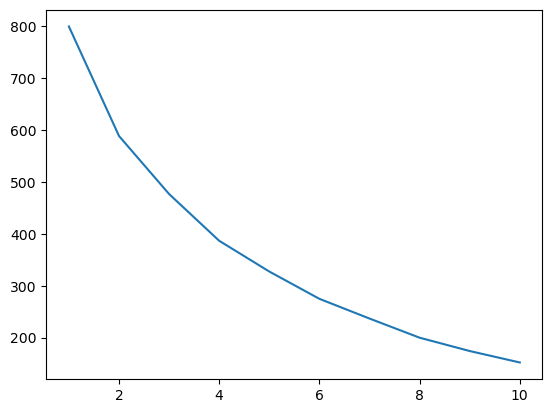

In [84]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

## Insights

#### -El cluster que más claridad de los datos nos brindó fue el bivariable entre las variables 'Spending Score' y 'Anual Income'
#### -El cluster en el que nos deberíamos enfocar es el 1, debido a que son clientes con alto 'Spending Score' y 'Anual Income' por lo que son los más probables de ser clientes activos en el mall. Además, el 54% de este cluster son mujeres, por lo que se podría desarrollar una campaña enfocada en este tipo de clientes.
#### -El cluster 3 también es interesante, debido a que son cliente con 'Spending Score' pero con bajo 'Anual Income', puede ser que sean clientes que compren productos en oferta (esto se podría verificar viendo que tipos de productos compran con el 'Client ID').
